In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loads second dataset
df2 = pd.read_csv("April26_Dataset_17172_13_Argumented.csv")

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206884 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   location_name      206884 non-null  int64
 1   home_language      206884 non-null  int64
 2   hh_occupation      206884 non-null  int64
 3   hh_edu             206884 non-null  int64
 4   hh_size            206884 non-null  int64
 5   school_distanceKm  206884 non-null  int64
 6   age                206884 non-null  int64
 7   gender             206884 non-null  int64
 8   mothers_edu        206884 non-null  int64
 9   grade              206884 non-null  int64
 10  meansToSchool      206884 non-null  int64
 11  hh_children        206884 non-null  int64
 12  dropout            206884 non-null  int64
dtypes: int64(13)
memory usage: 20.5 MB


In [4]:
df2.shape

(206884, 13)

In [5]:
df2.describe()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
count,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000,206884.000000
mean,0.033289,0.680294,1.175151,0.093067,6.724527,2.936820,15.450339,1.560082,0.666460,9.499903,0.161873,3.292057,0.097504
std,0.179391,0.936616,0.921967,0.349025,3.321582,1.086437,0.810677,0.496378,0.613032,0.714118,0.505372,2.122703,0.296643
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.000000,1.000000,0.000000,9.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,5.000000,3.000000,15.000000,1.000000,0.000000,9.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,6.000000,3.000000,16.000000,2.000000,1.000000,9.000000,0.000000,3.000000,0.000000
75%,0.000000,2.000000,1.000000,0.000000,8.000000,3.000000,16.000000,2.000000,1.000000,10.000000,0.000000,4.000000,0.000000
max,1.000000,3.000000,6.000000,3.000000,78.000000,100.000000,16.000000,2.000000,3.000000,12.000000,3.000000,18.000000,1.000000


In [6]:
df2.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,0,2,0,1,7,2,11,2,1,11,0,7,1
1,0,2,0,1,8,0,11,2,1,9,0,6,1
2,0,0,0,1,8,1,11,2,1,10,0,6,1
3,1,0,5,1,5,2,11,2,1,11,0,4,0
4,1,0,0,0,11,1,11,1,2,9,0,7,1


In [15]:
# print unique values in the column
columns = df2.columns
for col in columns:
    print(col)
    print(df2[col].unique())

location_name
[0 1]
home_language
[2 0 1 3]
hh_occupation
[0 5 2 3 1 4 6]
hh_edu
[1 0 3 2]
hh_size
[ 7  8  5 11 10  6 17  2 15  4  9  1  3 12 14 18 16 13 29 30 20 19 78 34
 25 24 21 28 22 23 31 26 35 73]
school_distanceKm
[  2   0   1   3   6   4  30   5  15  45   7  27   8  20  10   9  12  25
  11  14 100  60]
age
[11 12 13 14 15 16]
gender
[2 1]
mothers_edu
[1 2 3 0]
grade
[11  9 10 12]
meansToSchool
[0 1 2 3]
hh_children
[ 7  6  4  3  8  5 17 13  2  1  9 10 11 14 16 12 18 15]
dropout
[1 0]


In [8]:
labeled_df = df2.copy()

In [16]:
# print unique values in the column
columns = labeled_df.columns
for col in columns:
    print(col)
    print(labeled_df[col].unique())

location_name
[0 1]
home_language
[2 0 1]
hh_occupation
[0 5 2 3 1 4 6]
hh_edu
[1 0 3 2]
hh_size
[ 7  8  5 11 10  6 17  2 15  4  9  1  3 12 14 18 16 13 29 30 20 19 78 34
 25 24 21 28 22 23 31 26 35 73]
school_distanceKm
[  2   0   1   3   6   4  30   5  15  45   7  27   8  20  10   9  12  25
  11  14 100  60]
age
[11 12 13 14 15 16]
gender
[2 1]
mothers_edu
[1 2 3 0]
grade
[11  9 10 12]
meansToSchool
[0 1 2 3]
hh_children
[ 7  6  4  3  8  5 17 13  2  1  9 10 11 14 16 12 18 15]
dropout
[1 0]


In [18]:
# Mark 'dropout' as 1 where 'school_distanceKm' is greater than 30
labeled_df.loc[labeled_df['school_distanceKm'] > 15, 'dropout'] = 1

In [19]:
# Mark 'dropout' 1 where hh_size is greater than 10
labeled_df.loc[labeled_df['hh_size'] > 10, 'dropout'] = 1

In [20]:
# Mark 'dropout' 1 where hh_size is greater than 10
labeled_df.loc[labeled_df['hh_children'] > 10, 'dropout'] = 1

In [14]:
# if home_language >= 3 remove the row
labeled_df = labeled_df[labeled_df.home_language < 3]

In [ ]:
# #  remove hh_size rows with value > 18
# labeled_df = labeled_df[labeled_df['hh_size'] <= 18]

# #  remove school_distanceKM rows with value > 30
# labeled_df = labeled_df[labeled_df['school_distanceKm'] <= 30]

# # remove hh_children rows with value > 13
# labeled_df = labeled_df[labeled_df['hh_children'] <= 13]

In [21]:
# If 'meansToSchool' is 0 and 'school_distanceKm' is greater than 10, then 'dropout' is 1
labeled_df.loc[(labeled_df['meansToSchool'] == 0) & (labeled_df['school_distanceKm'] > 8), 'dropout'] = 1

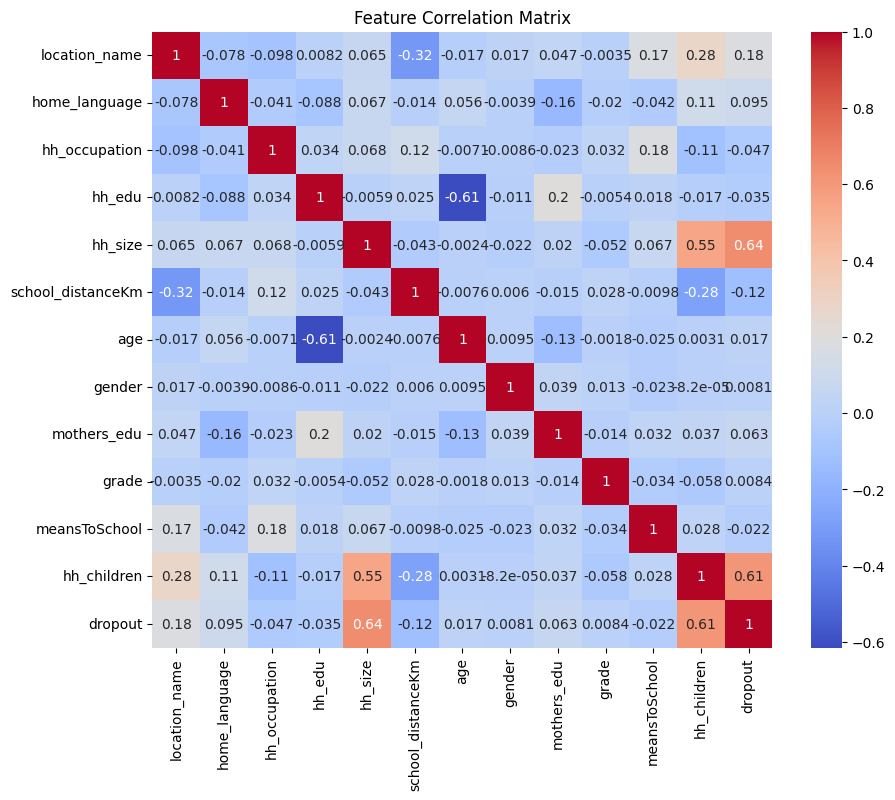

In [25]:
correlation_matrix = labeled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [26]:
df_corr = correlation_matrix['dropout']
df_abs_corr = df_corr.abs().sort_values(ascending=True)
df_abs_corr = pd.DataFrame(df_abs_corr)
df_abs_corr

,dropout
gender,0.008125
grade,0.008362
age,0.016649
meansToSchool,0.022155
hh_edu,0.035041
hh_occupation,0.047341
mothers_edu,0.063039
home_language,0.095066
school_distanceKm,0.123164
location_name,0.178531


In [27]:
# map values of hh_children to 0 = 'None', 1 = 'Two Children', 2 = 'Three Children', 3 = 'Four', 4 = 'Five', else 5 = 'More than five'
# Define the mapping
mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children'}

# Apply the mapping to the hh_children column
labeled_df['hh_children'] = labeled_df['hh_children'].map(mapping).fillna('More than five')

In [28]:
mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children'}

# Apply the mapping to the hh_children column
labeled_df['hh_size'] = labeled_df['hh_size'].map(mapping).fillna('More than five')

In [24]:
# Define the bins and labels
bins = [-1, 0.5, 1, 2, 3, 5, 7, 10, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

# Convert school_distanceKm to categorical
labeled_df['school_distanceKm'] = pd.cut(labeled_df['school_distanceKm'], bins=bins, labels=labels)

In [29]:
labeled_df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,0,2,0,1,More than five,3,11,2,1,11,0,More than five,1
1,0,2,0,1,More than five,1,11,2,1,9,0,More than five,1
2,0,0,0,1,More than five,2,11,2,1,10,0,More than five,1
3,1,0,5,1,More than five,3,11,2,1,11,0,Five Children,0
4,1,0,0,0,More than five,2,11,1,2,9,0,More than five,1


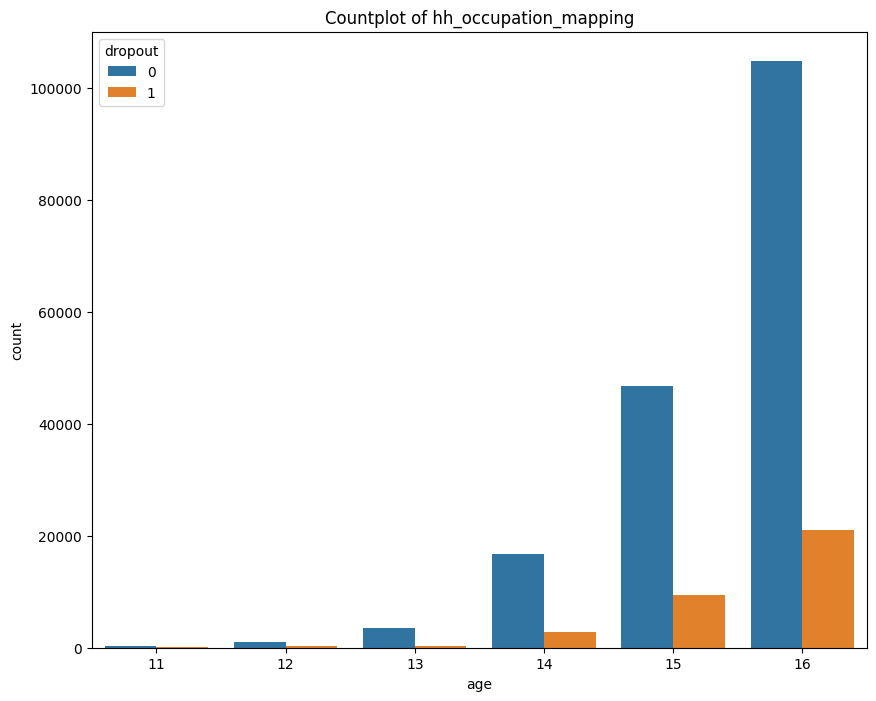

In [31]:
# countplot  hh_occupation_mapping
plt.figure(figsize=(10, 8))
sns.countplot(x='age', data=labeled_df, hue='dropout')
plt.title('Countplot of hh_occupation_mapping')
plt.show()

In [32]:
# Define the mappings
gender_mapping = {1: 'Male', 2: 'Female'}
home_language_mapping = {0: 'Kiswahili', 1: 'English', 2: 'Native language'}
hh_occupation_mapping = {0: 'Other', 1: 'Unemployed', 2: 'Agriculture', 3: 'Self-employed', 4: 'Public sector', 5: 'Private sector', 6: 'Housewife'}
hh_children_mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children', 5: 'More than five'}
mothers_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
hh_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
meansToSchool_mapping = {0: 'Walk', 1: 'Bicycle/motorbike', 2: 'Public transport', 3: 'Private car'}
location_name_mapping = {0: 'Rural', 1: 'Urban'}
grade_mapping = {9: 'Form One', 10: 'Form Two', 11: 'Form Three', 12: 'Form Four'}
dropout_mapping = {0: 'No', 1: 'Yes'}
school_distance_mapping = {1: '0-0.5 km', 2: '0.5-1 km', 3: '1-2 km', 4: '2-3 km', 5: '4-5 km', 6: '6-7 km', 7: '7-10 km', 8: 'More than 11 km'}


# Apply the mappings
labeled_df['gender'] = labeled_df['gender'].map(gender_mapping)
labeled_df['home_language'] = labeled_df['home_language'].map(home_language_mapping)
labeled_df['hh_occupation'] = labeled_df['hh_occupation'].map(hh_occupation_mapping)
# labeled_df['hh_children'] = labeled_df['hh_children'].map(hh_children_mapping)
labeled_df['mothers_edu'] = labeled_df['mothers_edu'].map(mothers_edu_mapping)
labeled_df['hh_edu'] = labeled_df['hh_edu'].map(hh_edu_mapping)
labeled_df['meansToSchool'] = labeled_df['meansToSchool'].map(meansToSchool_mapping)
labeled_df['location_name'] = labeled_df['location_name'].map(location_name_mapping)
labeled_df['grade'] = labeled_df['grade'].map(grade_mapping)
labeled_df['school_distanceKm'] = labeled_df['school_distanceKm'].map(school_distance_mapping)
labeled_df['dropout'] = labeled_df['dropout'].map(dropout_mapping)

# Display the head of the DataFrame
labeled_df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,Native language,Other,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,More than five,Yes
1,Rural,Native language,Other,Primary,More than five,0-0.5 km,11,Female,Primary,Form One,Walk,More than five,Yes
2,Rural,Kiswahili,Other,Primary,More than five,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five,Yes
3,Urban,Kiswahili,Private sector,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,Five Children,No
4,Urban,Kiswahili,Other,None,More than five,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five,Yes


In [33]:
# print unique values in the column
columns = labeled_df.columns
for col in columns:
    print(col)
    print(labeled_df[col].unique())

location_name
['Rural' 'Urban']
home_language
['Native language' 'Kiswahili' 'English']
hh_occupation
['Other' 'Private sector' 'Agriculture' 'Self-employed' 'Unemployed'
 'Public sector' 'Housewife']
hh_edu
['Primary' 'None' 'Postsecondary' 'Secondary']
hh_size
['More than five' 'Three Children' 'Five Children' 'Two Children'
 'Four Children']
school_distanceKm
['1-2 km', '0-0.5 km', '0.5-1 km', '2-3 km', '6-7 km', '4-5 km', 'More than 11 km', '7-10 km']
Categories (8, object): ['0-0.5 km' < '0.5-1 km' < '1-2 km' < '2-3 km' < '4-5 km' < '6-7 km' < '7-10 km' < 'More than 11 km']
age
[11 12 13 14 15 16]
gender
['Female' 'Male']
mothers_edu
['Primary' 'Secondary' 'Postsecondary' 'None']
grade
['Form Three' 'Form One' 'Form Two' 'Form Four']
meansToSchool
['Walk' 'Bicycle/motorbike' 'Public transport' 'Private car']
hh_children
['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
dropout
['Yes' 'No']


In [34]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206883 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   location_name      206883 non-null  object  
 1   home_language      206883 non-null  object  
 2   hh_occupation      206883 non-null  object  
 3   hh_edu             206883 non-null  object  
 4   hh_size            206883 non-null  object  
 5   school_distanceKm  206883 non-null  category
 6   age                206883 non-null  int64   
 7   gender             206883 non-null  object  
 8   mothers_edu        206883 non-null  object  
 9   grade              206883 non-null  object  
 10  meansToSchool      206883 non-null  object  
 11  hh_children        206883 non-null  object  
 12  dropout            206883 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 20.7+ MB


In [35]:
labeled_df.dropna(inplace=True)

In [36]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206883 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   location_name      206883 non-null  object  
 1   home_language      206883 non-null  object  
 2   hh_occupation      206883 non-null  object  
 3   hh_edu             206883 non-null  object  
 4   hh_size            206883 non-null  object  
 5   school_distanceKm  206883 non-null  category
 6   age                206883 non-null  int64   
 7   gender             206883 non-null  object  
 8   mothers_edu        206883 non-null  object  
 9   grade              206883 non-null  object  
 10  meansToSchool      206883 non-null  object  
 11  hh_children        206883 non-null  object  
 12  dropout            206883 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 20.7+ MB


In [37]:
categorical_columns = labeled_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = labeled_df.select_dtypes(include=['int64', 'float64']).columns

In [38]:
categorical_columns, numerical_columns

(Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
        'school_distanceKm', 'gender', 'mothers_edu', 'grade', 'meansToSchool',
        'hh_children', 'dropout'],
       dtype='object'),
 Index(['age'], dtype='object'))

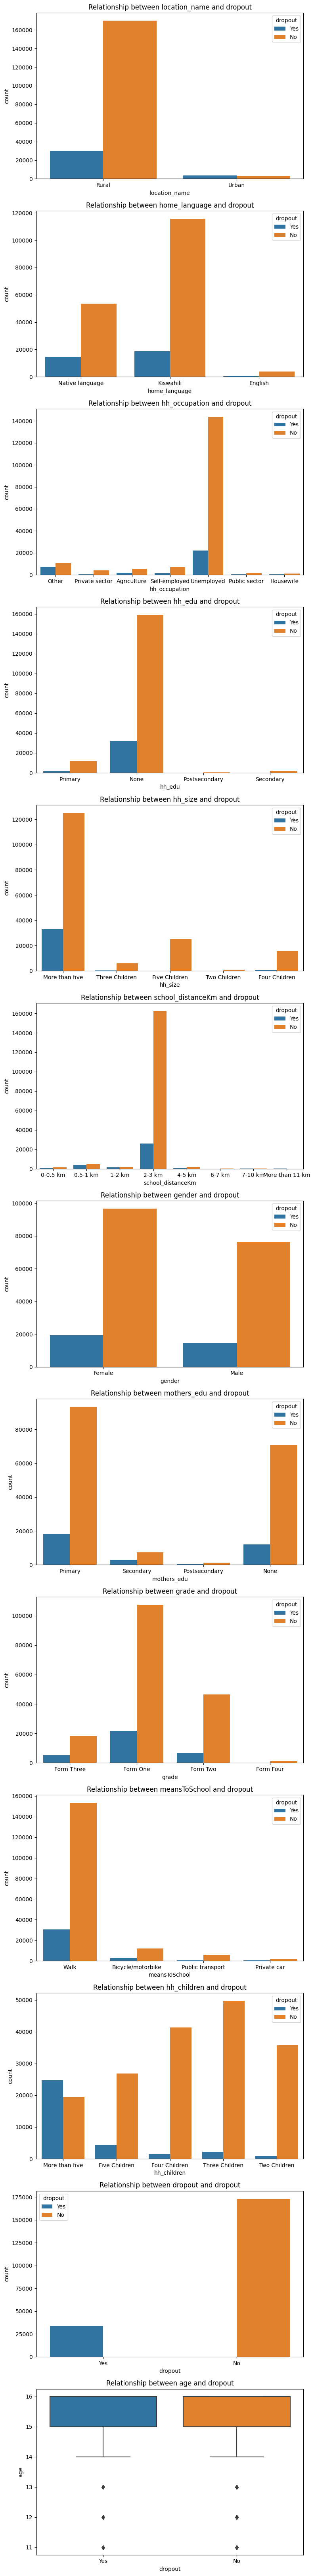

In [39]:
# Calculate the number of rows and columns for the grid
grid_rows = len(categorical_columns) + len(numerical_columns)
grid_cols = 2

fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(15, 5 * grid_rows))

# Loop through all categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='dropout', data=labeled_df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Relationship between {col} and dropout')

# Loop through all numerical columns
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='dropout', y=col, data=labeled_df, ax=axs[i + len(categorical_columns), 0])
    axs[i + len(categorical_columns), 0].set_title(f'Relationship between {col} and dropout')

# Remove unused subplots
for i in range(grid_rows):
    fig.delaxes(axs[i, 1])

plt.tight_layout()
plt.show()

In [40]:
labeled_df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'mothers_edu', 'grade',
       'meansToSchool', 'hh_children', 'dropout'],
      dtype='object')

In [41]:
def plot_count_by_column(df, column):
    # Get unique values in the column
    unique_values = df[column].unique()
    try:
        unique_values.sort()
    except:
        pass
    # Calculate the number of rows and columns for the grid
    grid_size = int(np.ceil(np.sqrt(len(unique_values))))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Loop through all unique values
    for i, value in enumerate(unique_values):
        # Calculate the row and column index for the subplot
        row = i // grid_size
        col = i % grid_size

        # Filter the DataFrame for only the current value
        filtered_df = df[df[column] == value]

        # Create a count plot for dropout
        filtered_df['dropout'].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_title(f'{column} = {value}')
        axs[row, col].set_xlabel('Dropout')
        axs[row, col].set_ylabel('Count')

    # Remove unused subplots
    for j in range(i+1, grid_size*grid_size):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

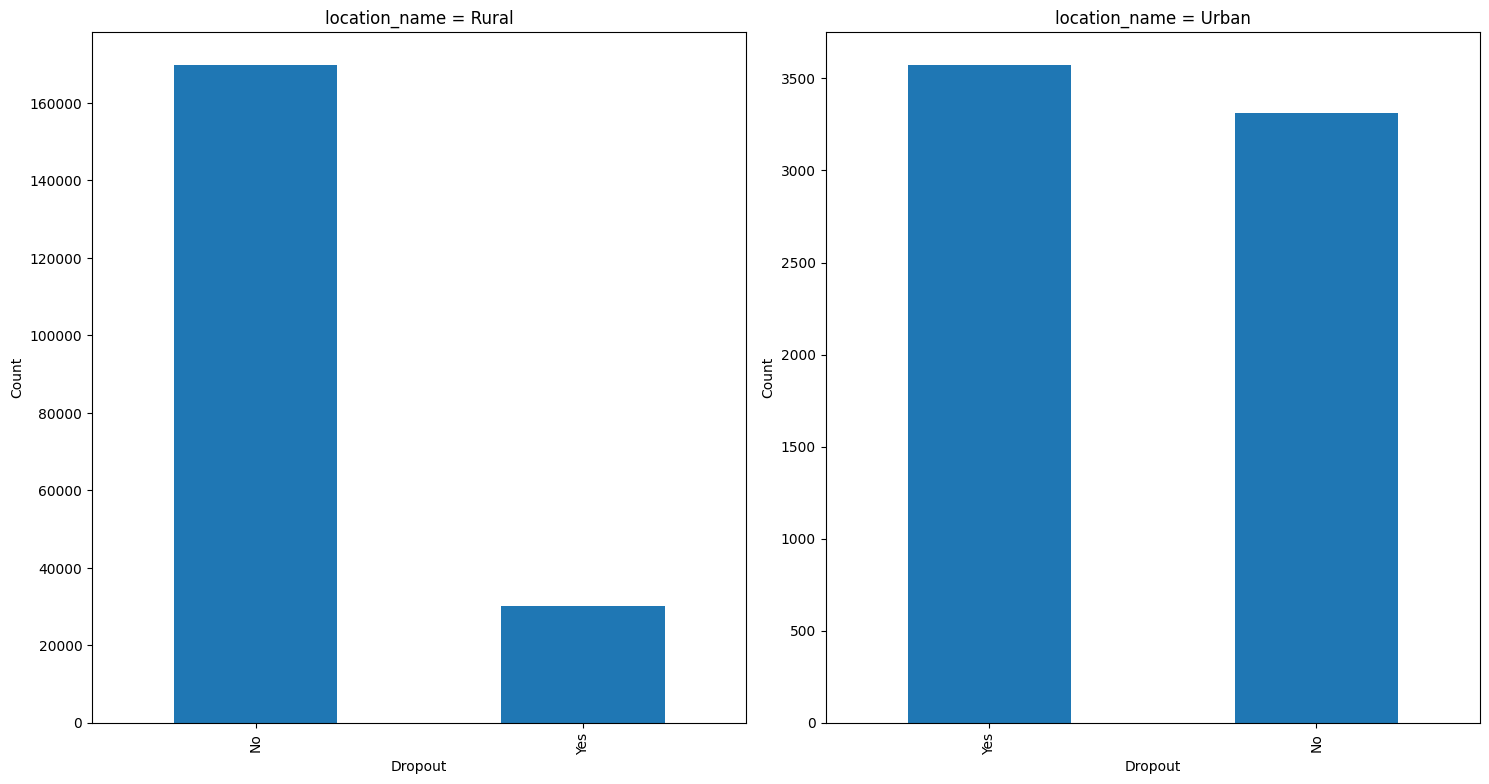

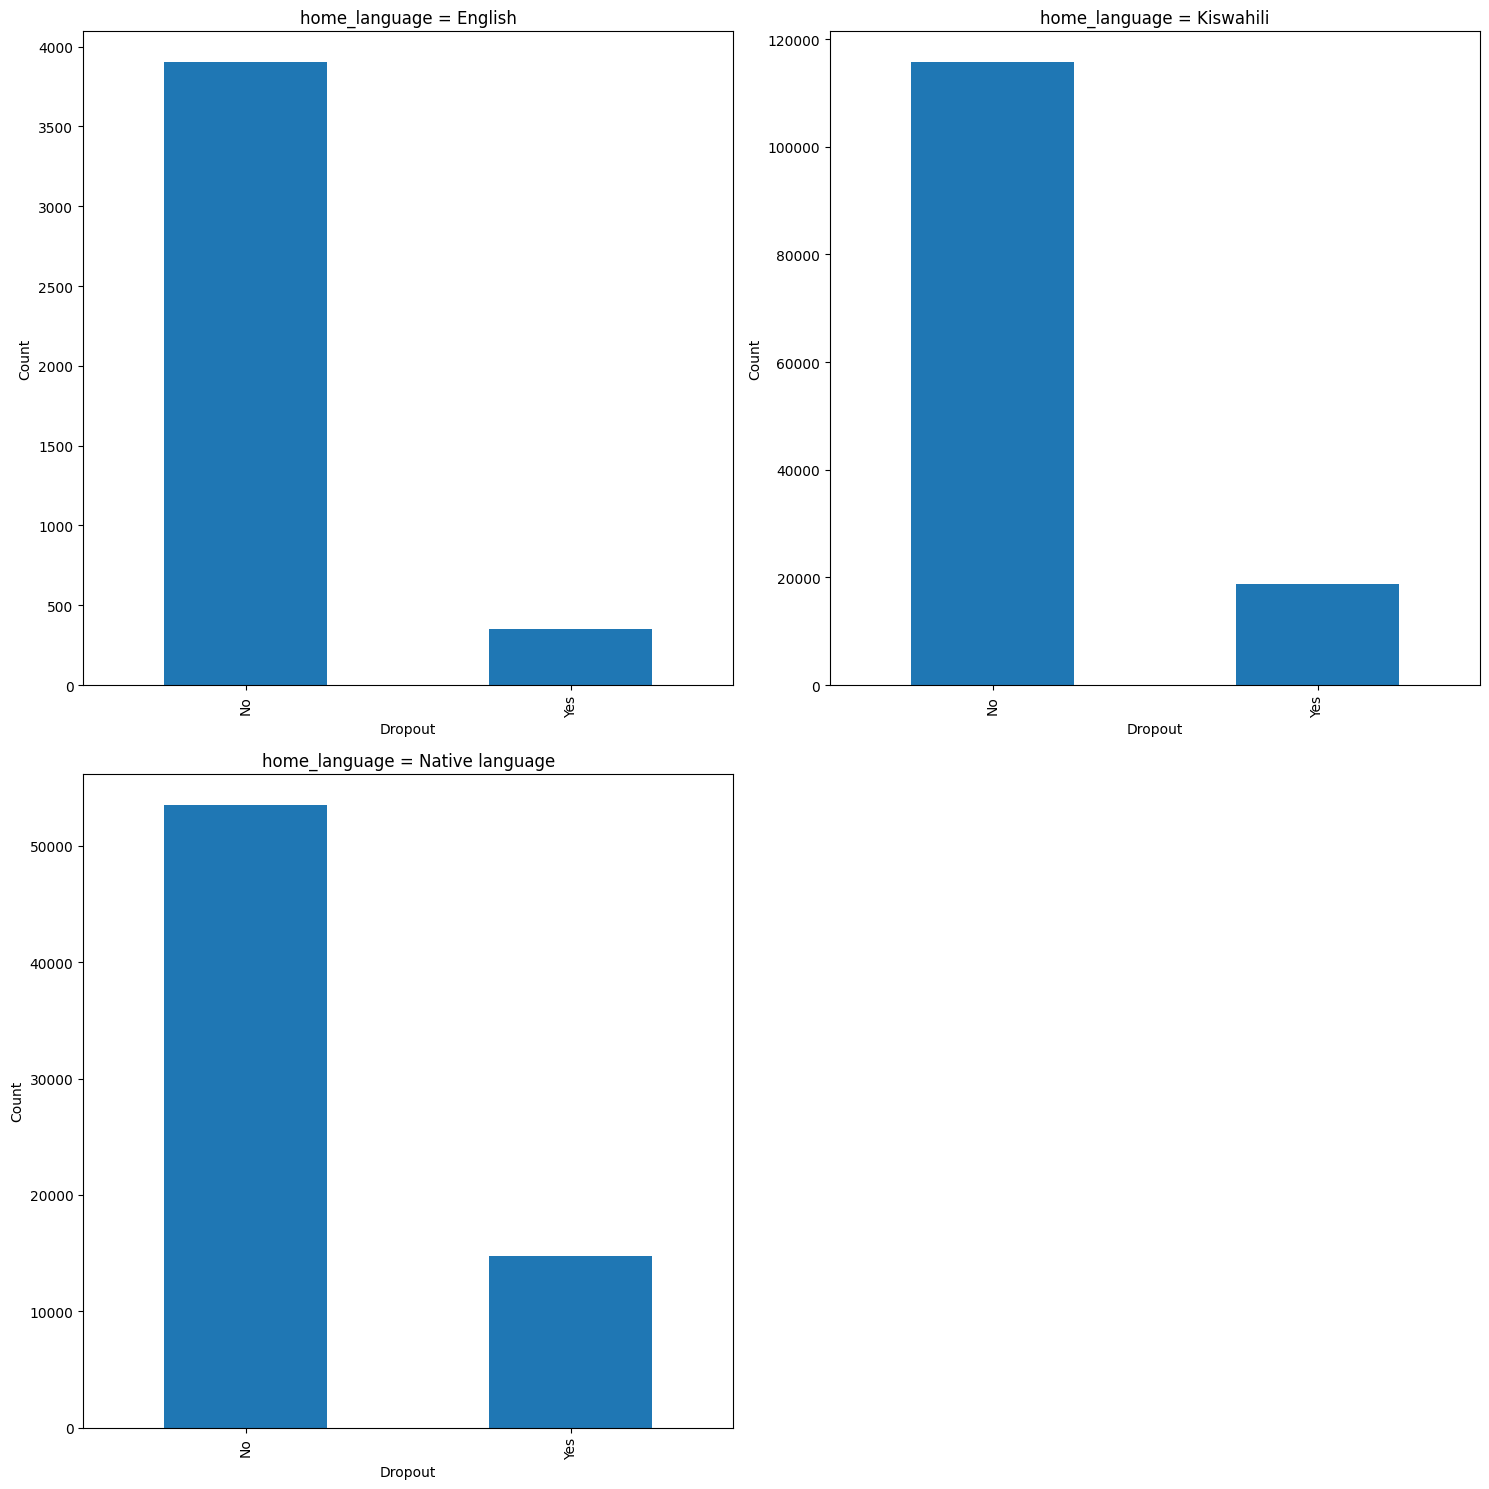

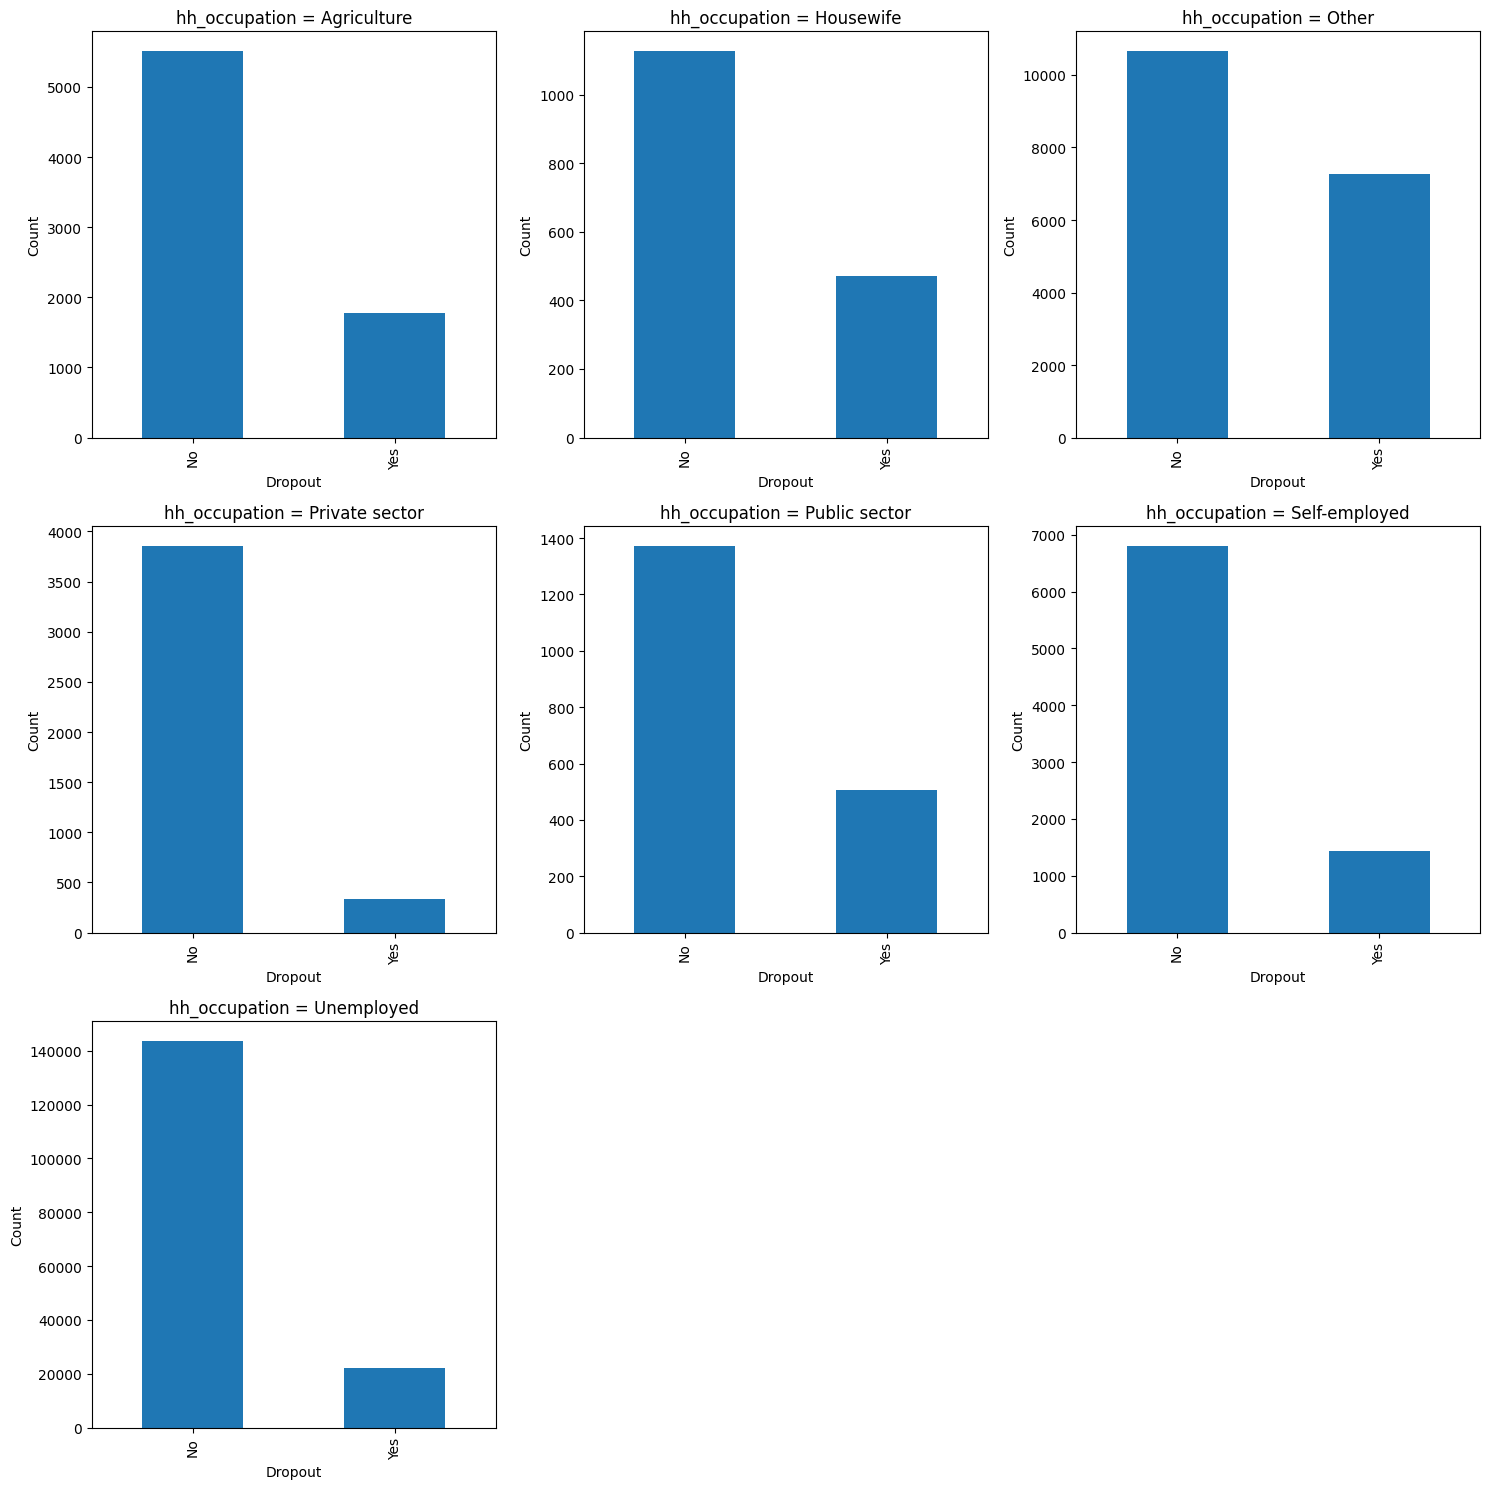

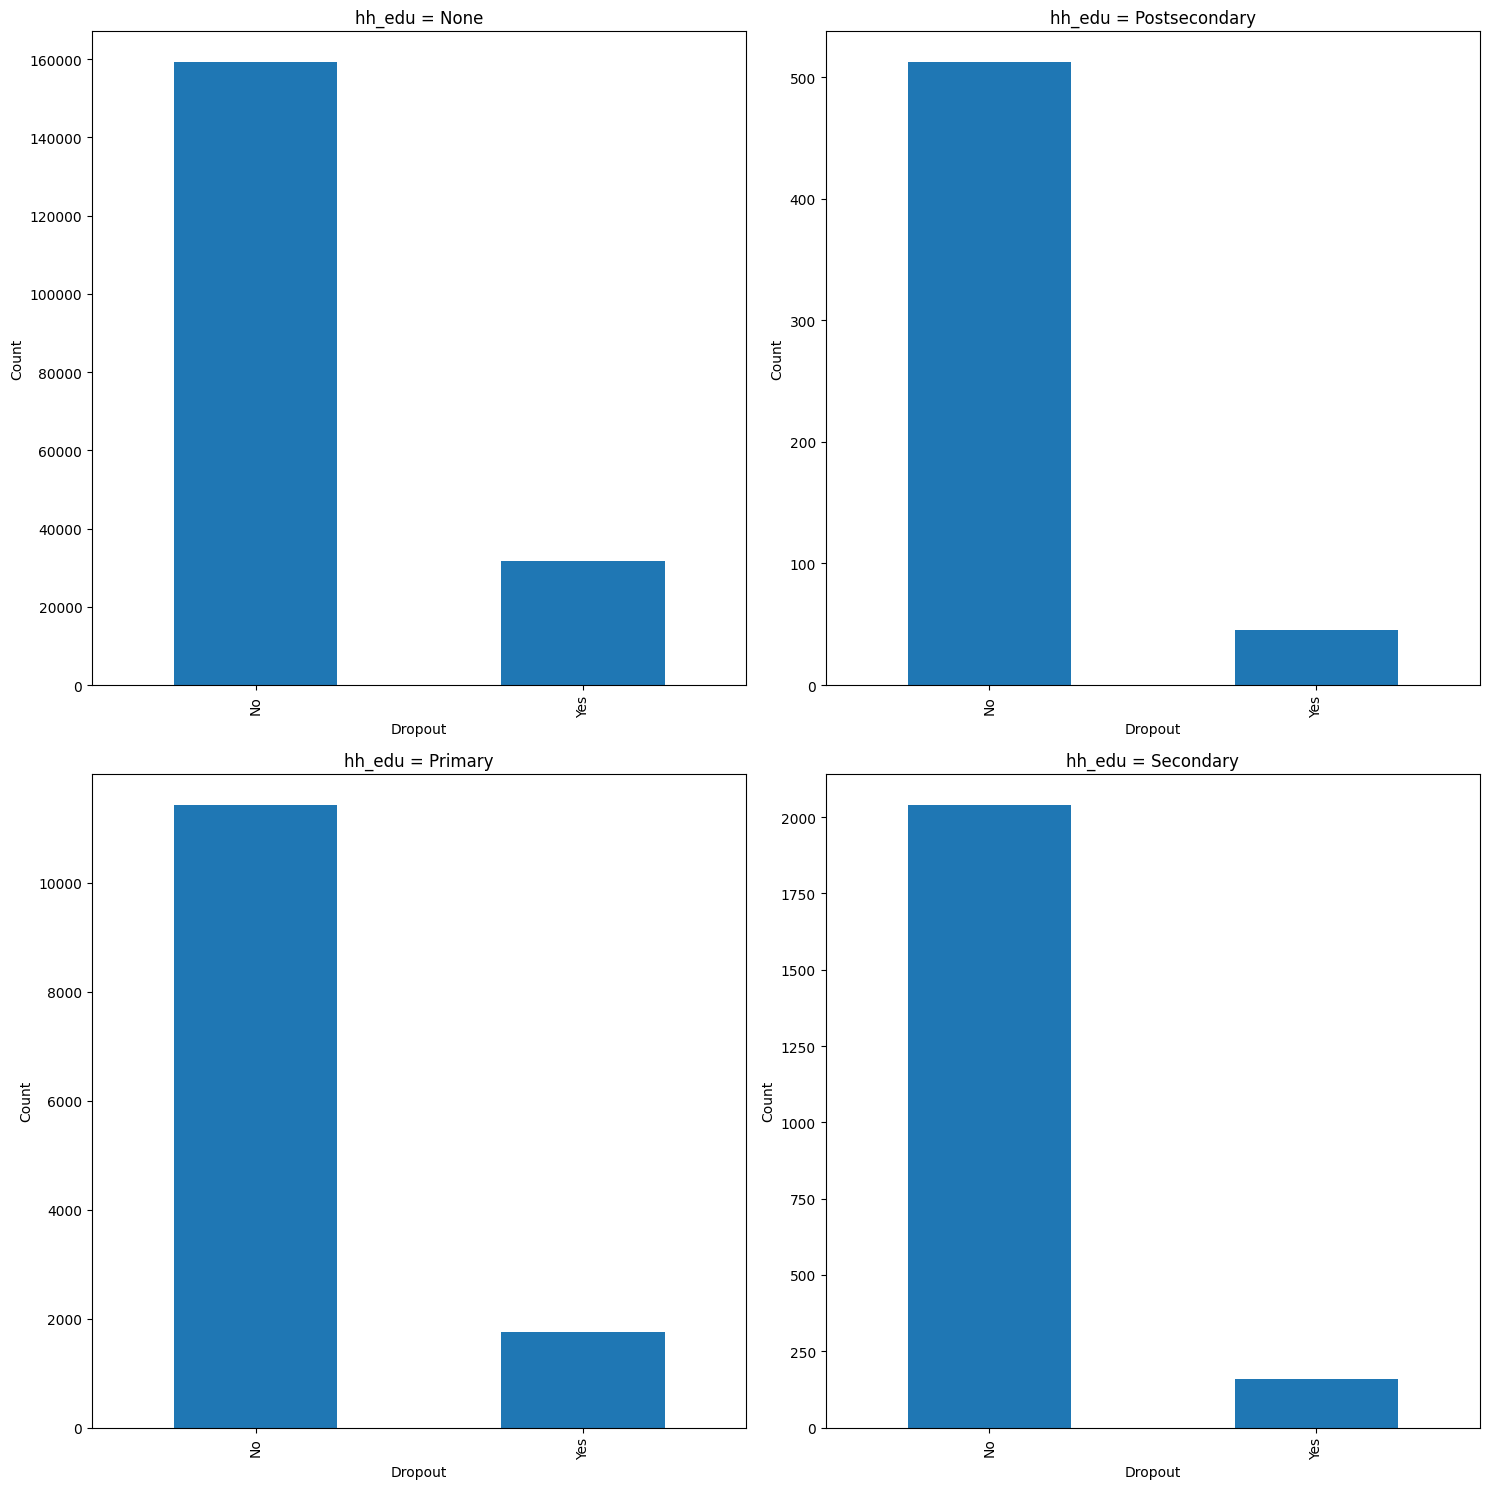

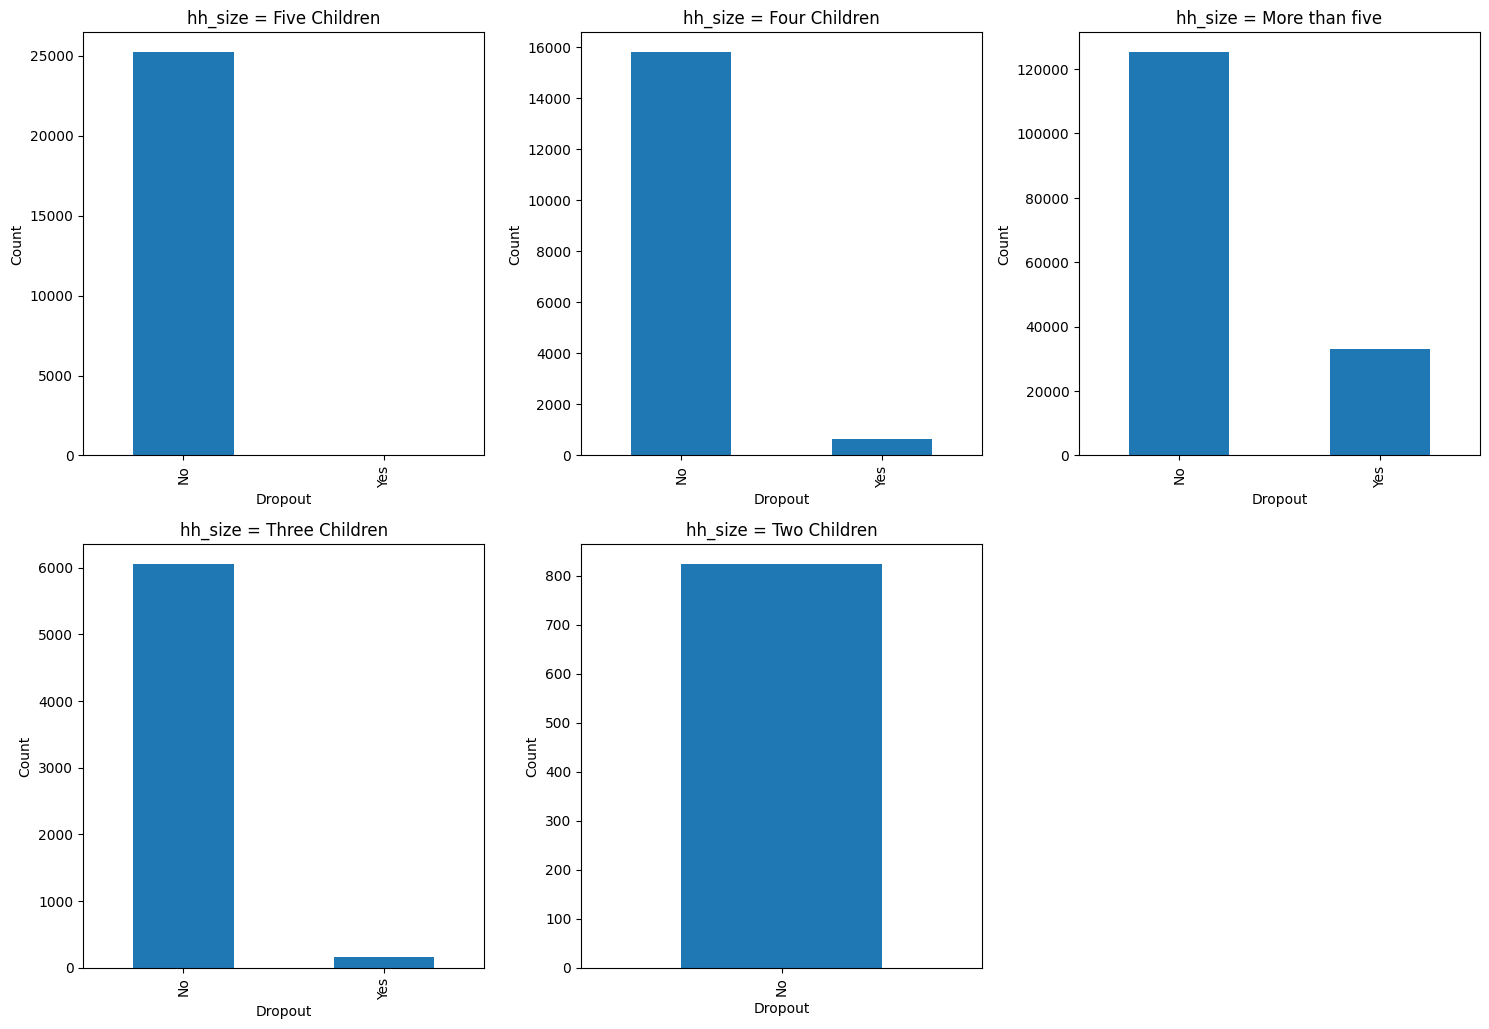

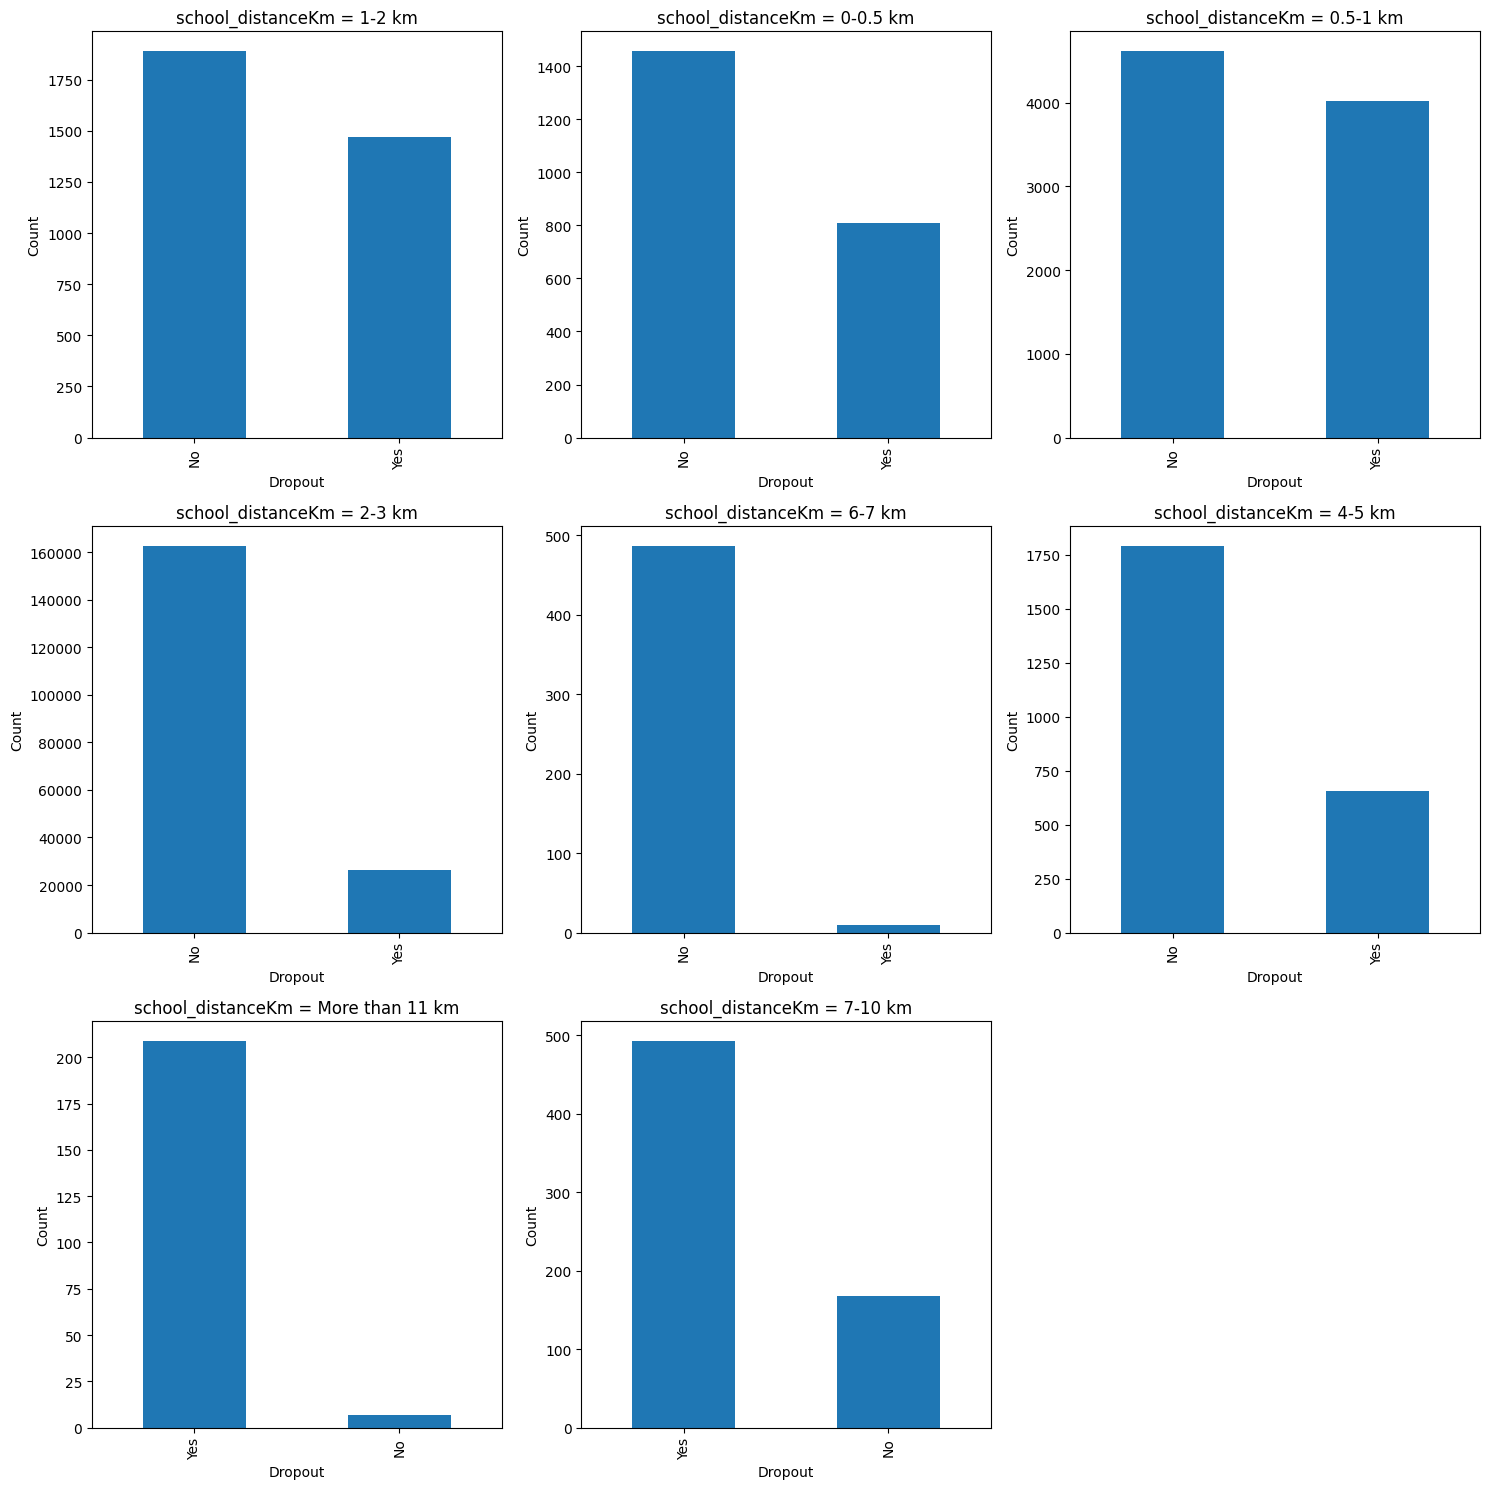

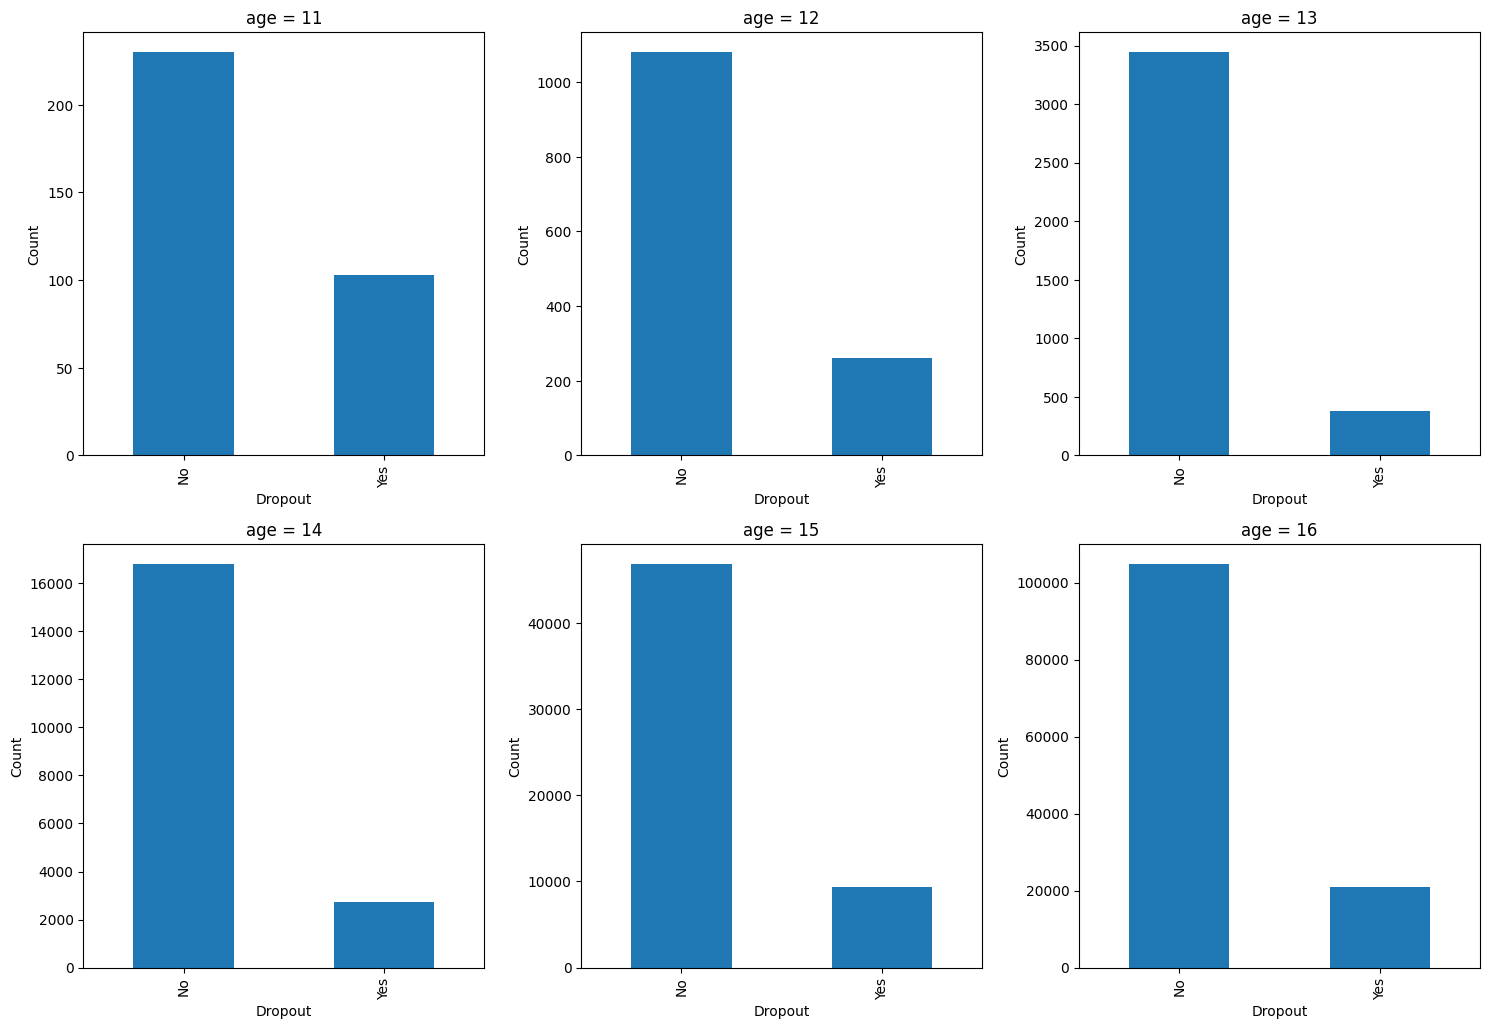

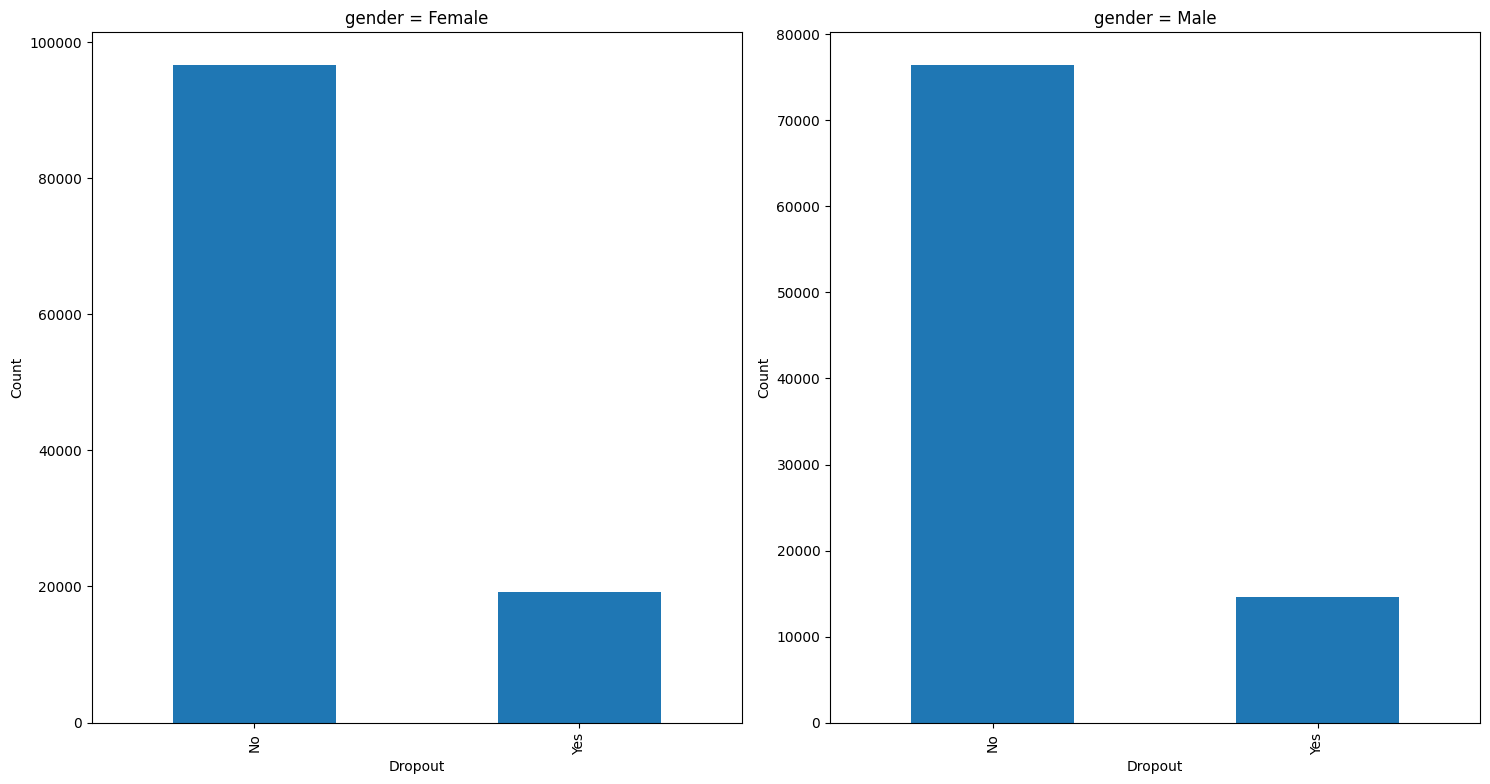

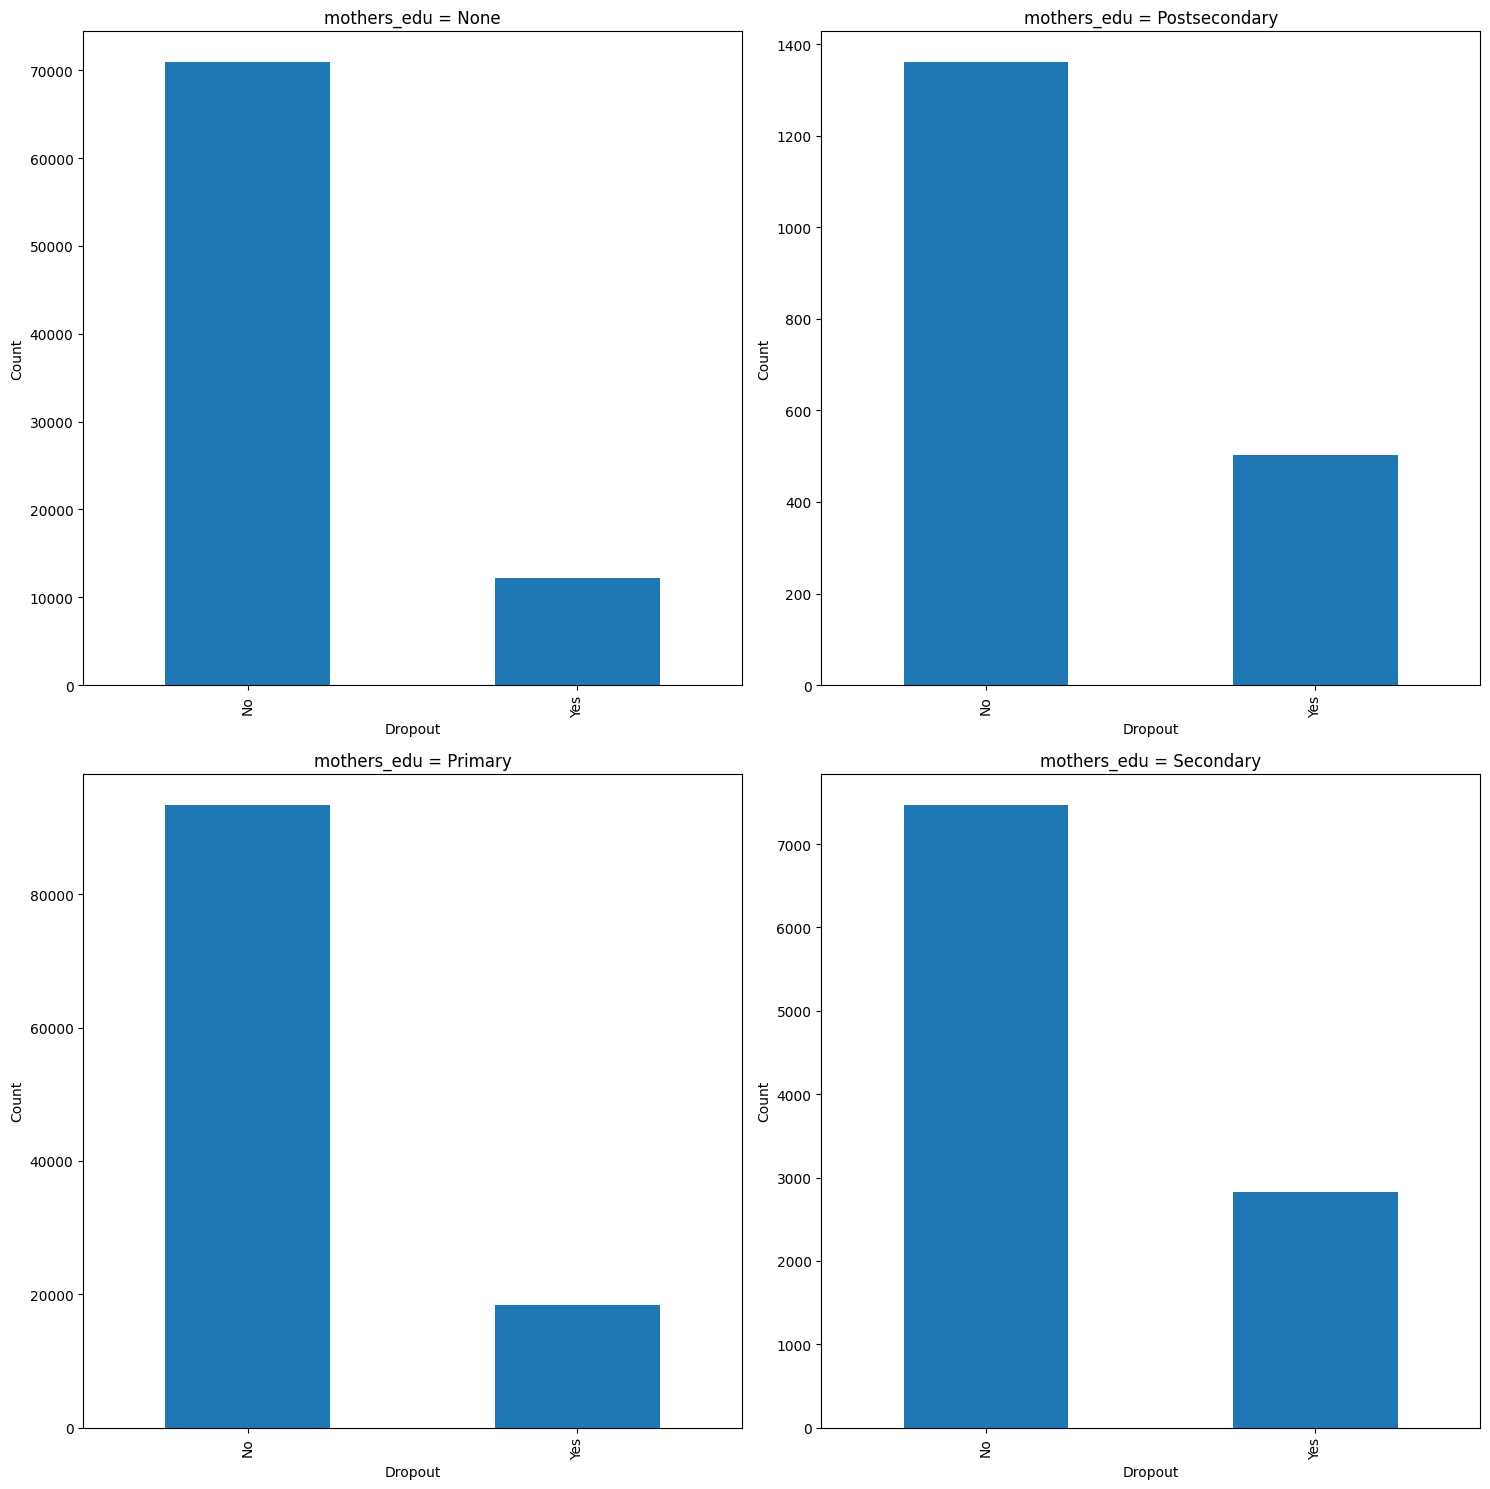

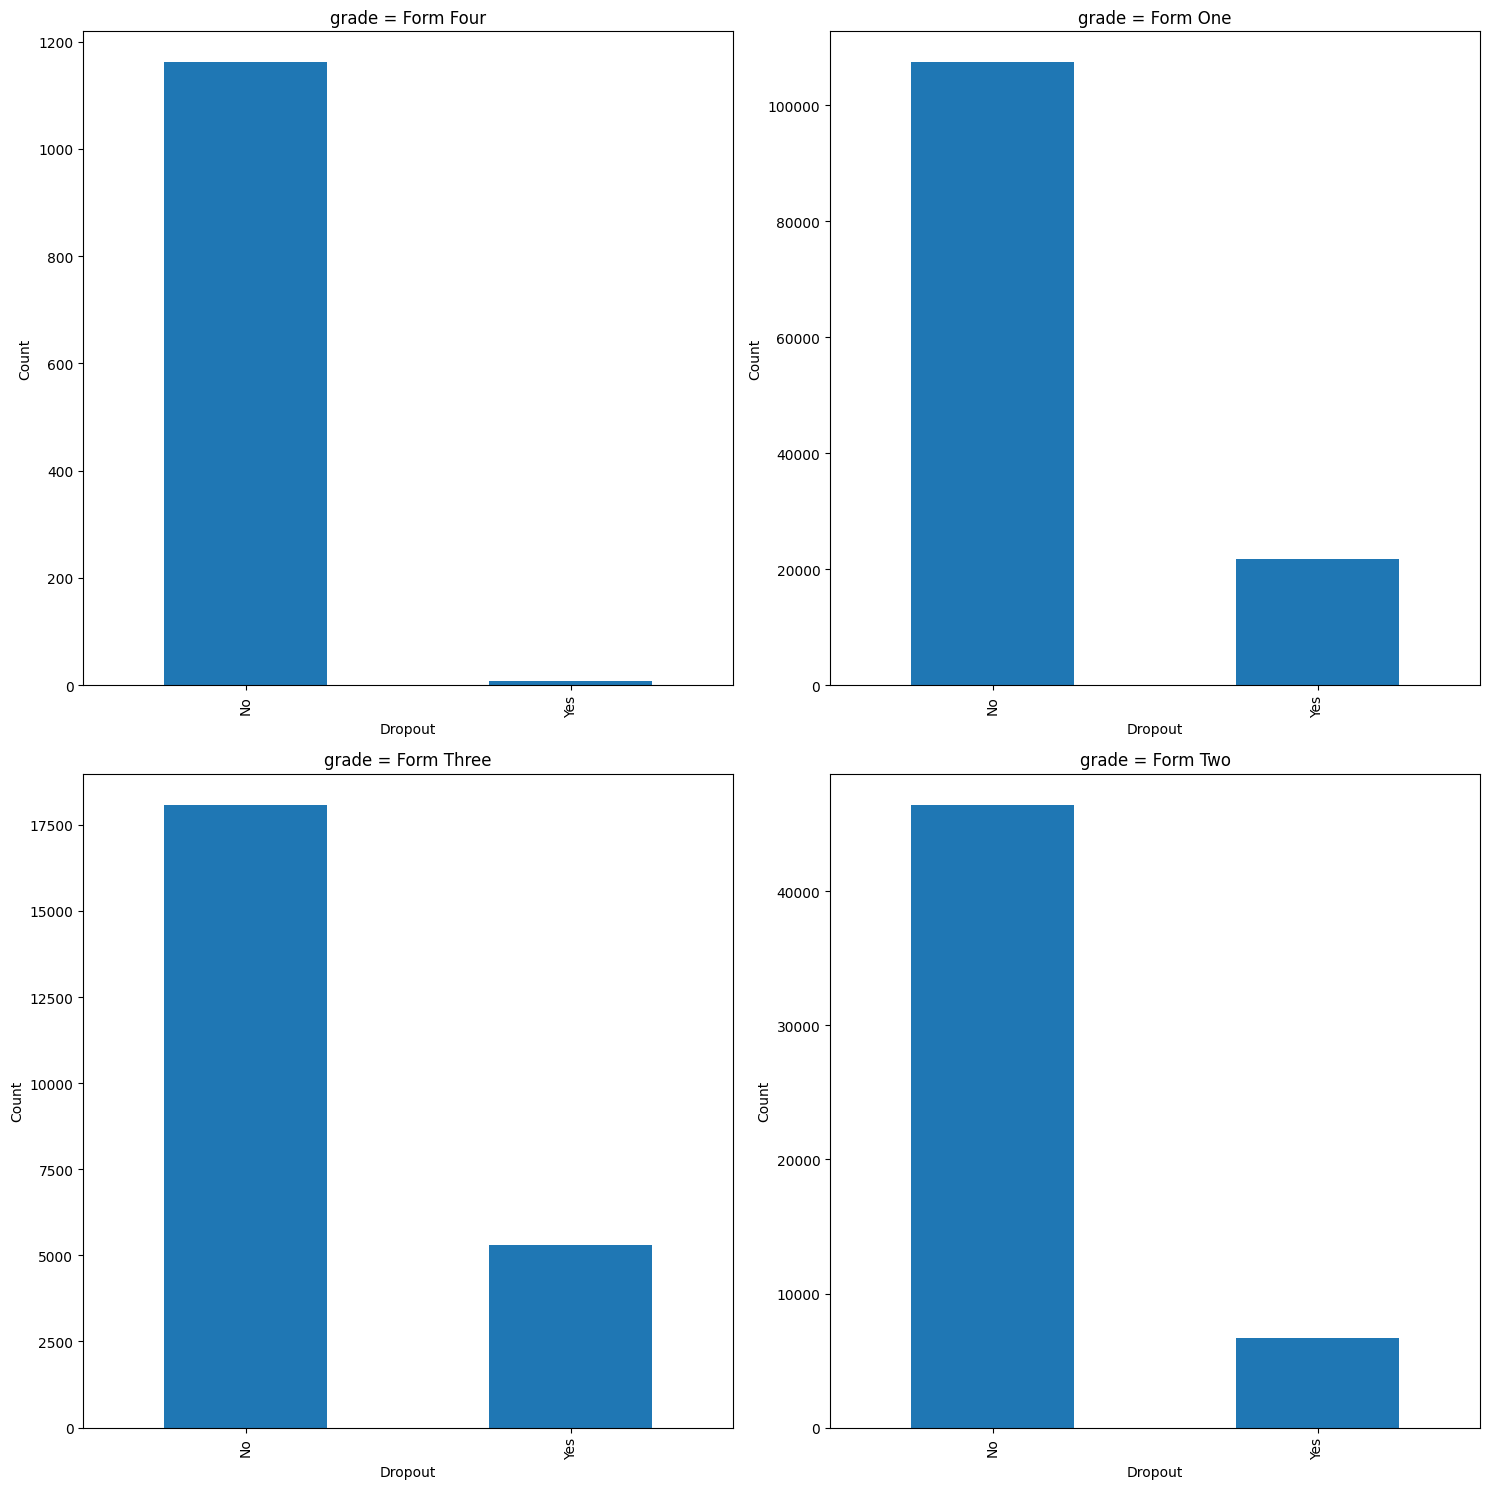

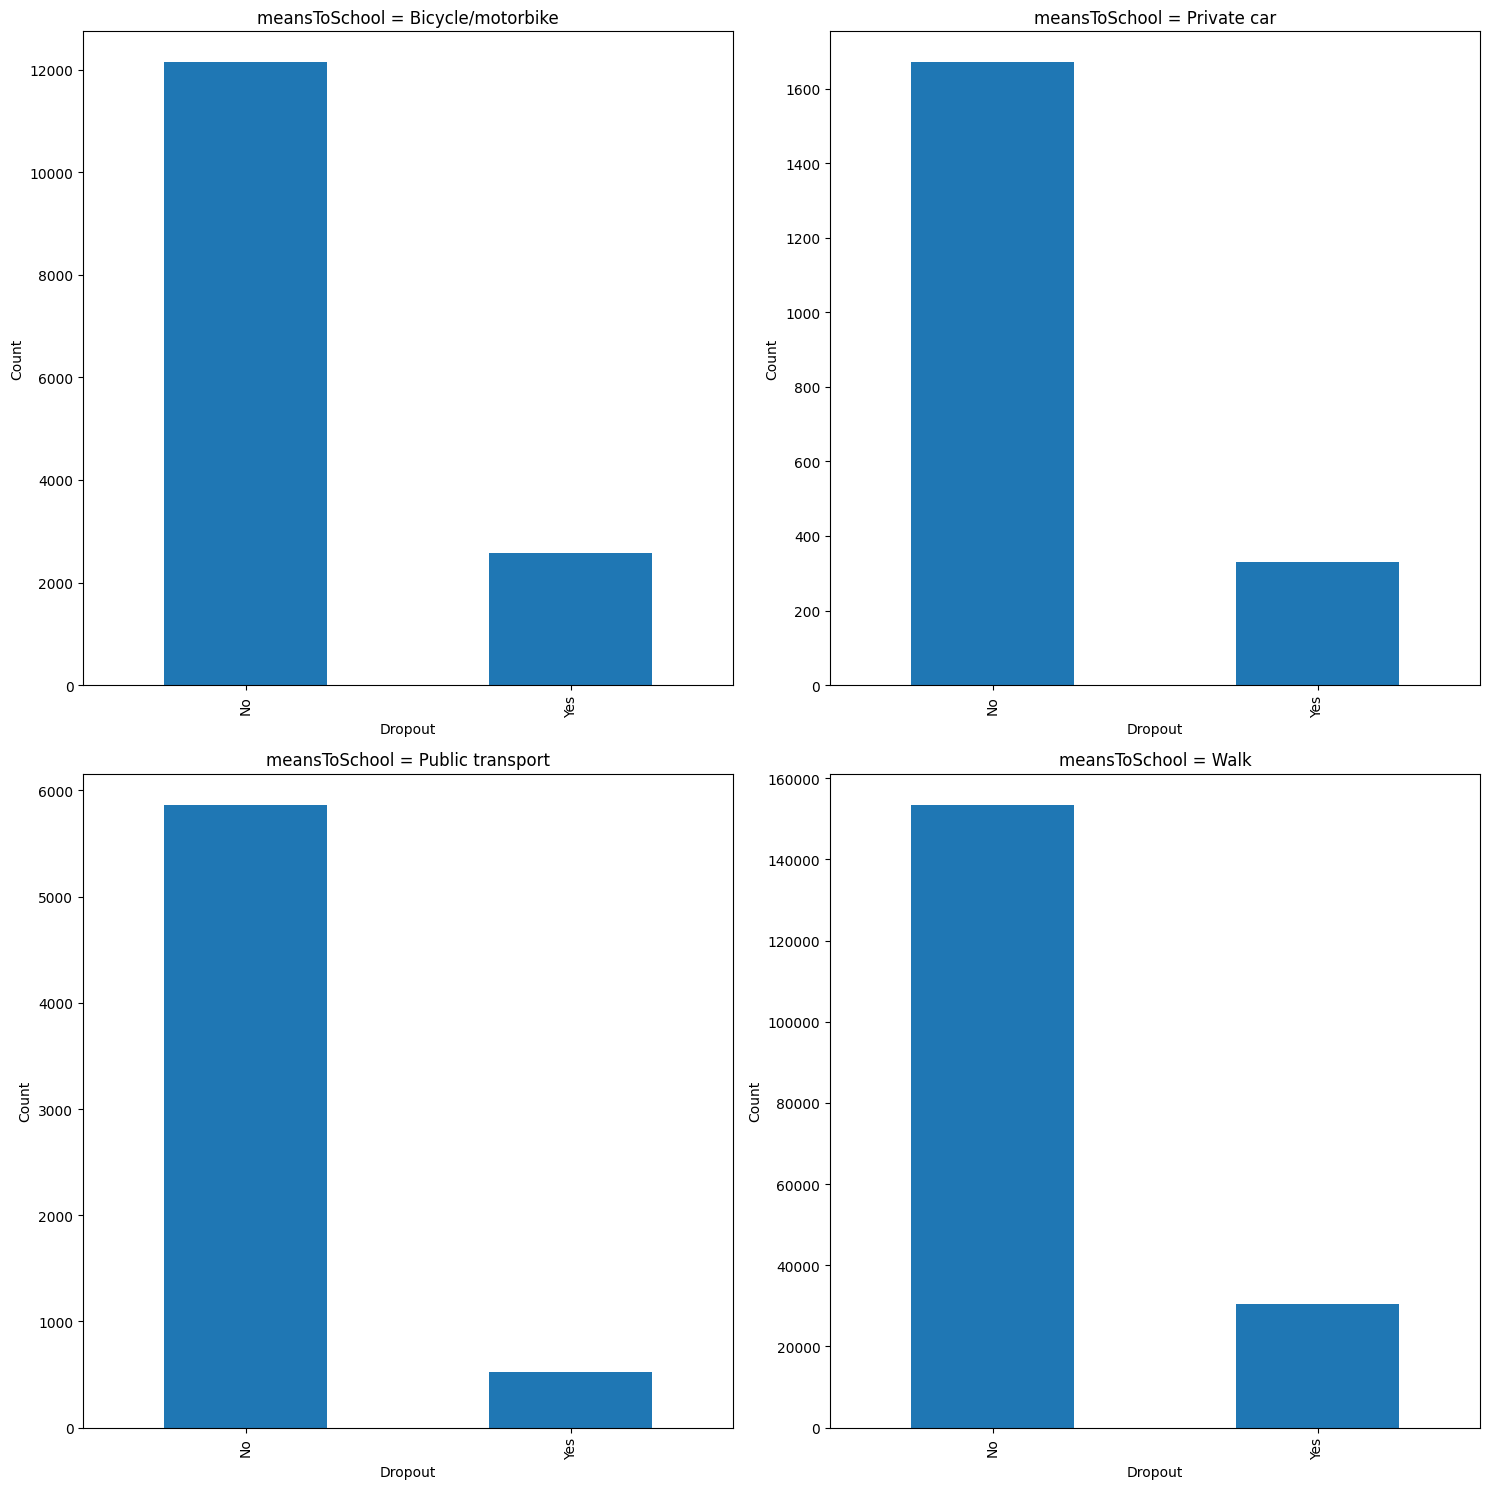

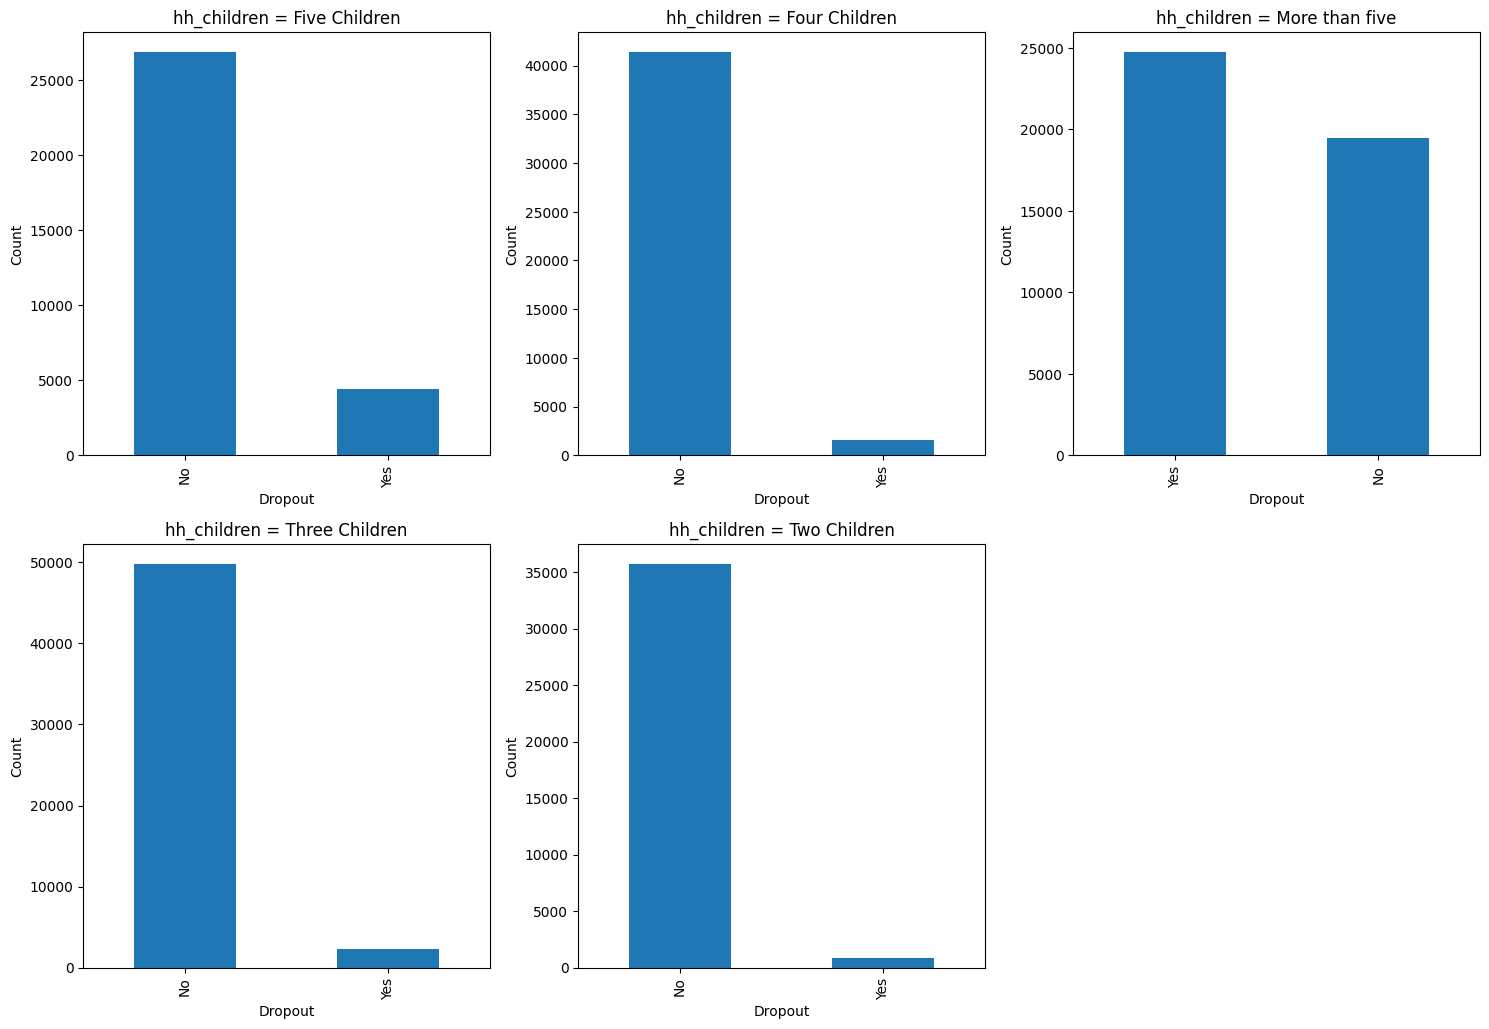

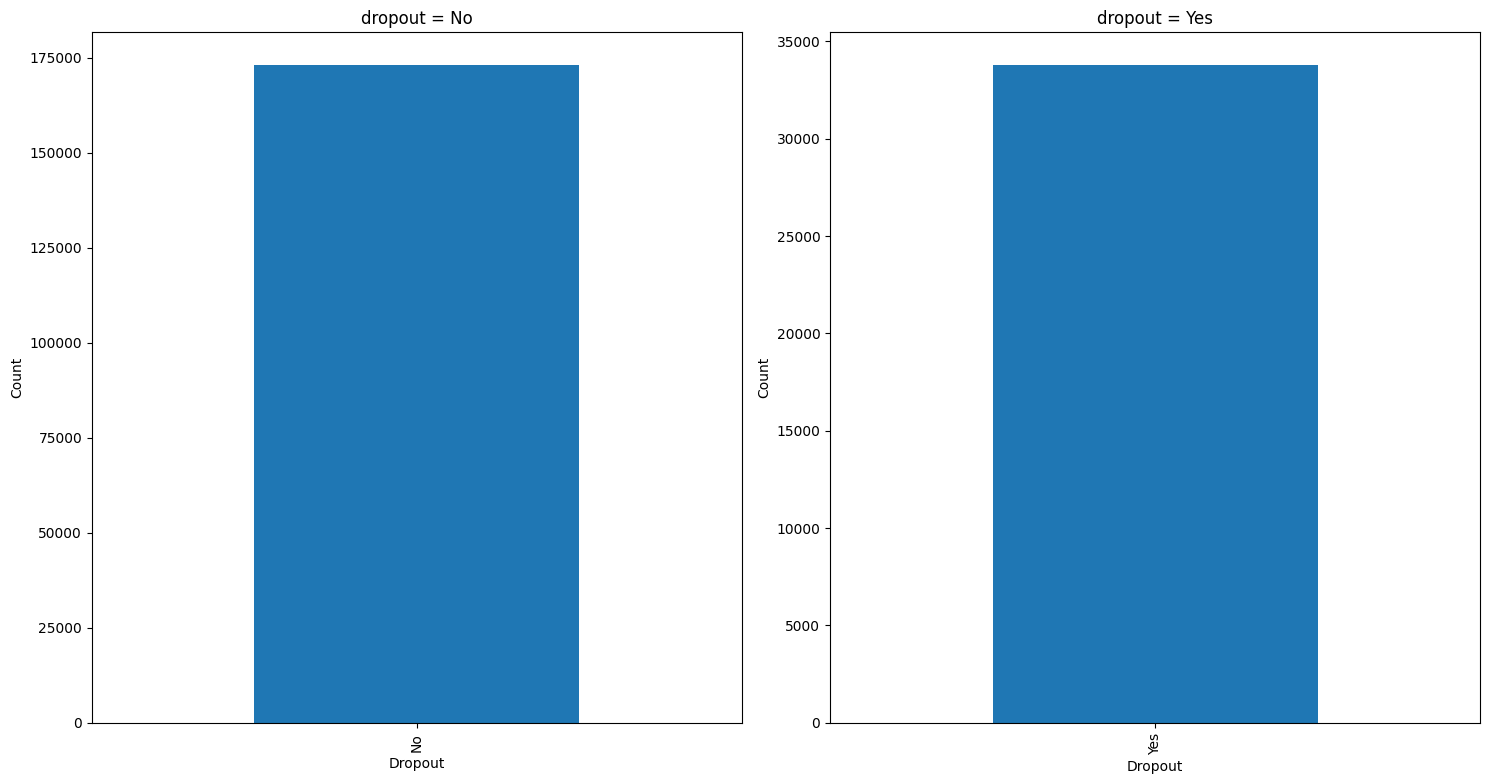

In [42]:
for col in labeled_df.columns:
    plot_count_by_column(labeled_df, col)

In [43]:
labeled_df.to_csv('_cleaned_secondary_school_dropout_dataset.csv', index=False)

In [44]:
df = labeled_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206883 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   location_name      206883 non-null  object  
 1   home_language      206883 non-null  object  
 2   hh_occupation      206883 non-null  object  
 3   hh_edu             206883 non-null  object  
 4   hh_size            206883 non-null  object  
 5   school_distanceKm  206883 non-null  category
 6   age                206883 non-null  int64   
 7   gender             206883 non-null  object  
 8   mothers_edu        206883 non-null  object  
 9   grade              206883 non-null  object  
 10  meansToSchool      206883 non-null  object  
 11  hh_children        206883 non-null  object  
 12  dropout            206883 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 20.7+ MB


In [45]:
df.columns

Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
       'school_distanceKm', 'age', 'gender', 'mothers_edu', 'grade',
       'meansToSchool', 'hh_children', 'dropout'],
      dtype='object')

In [46]:
# Reverse mappings
gender_mapping_reverse = {v: k for k, v in gender_mapping.items()}
home_language_mapping_reverse = {v: k for k, v in home_language_mapping.items()}
hh_occupation_mapping_reverse = {v: k for k, v in hh_occupation_mapping.items()}
hh_children_mapping_reverse = {v: k for k, v in hh_children_mapping.items()}
mothers_edu_mapping_reverse = {v: k for k, v in mothers_edu_mapping.items()}
hh_edu_mapping_reverse = {v: k for k, v in hh_edu_mapping.items()}
meansToSchool_mapping_reverse = {v: k for k, v in meansToSchool_mapping.items()}
location_name_mapping_reverse = {v: k for k, v in location_name_mapping.items()}
grade_mapping_reverse = {v: k for k, v in grade_mapping.items()}
dropout_mapping_reverse = {v: k for k, v in dropout_mapping.items()}
school_distance_mapping_reverse = {v: k for k, v in school_distance_mapping.items()}

In [47]:
# Assuming df is your DataFrame
df['gender'] = df['gender'].map(gender_mapping_reverse)
df['home_language'] = df['home_language'].map(home_language_mapping_reverse)
df['hh_occupation'] = df['hh_occupation'].map(hh_occupation_mapping_reverse)
df['mothers_edu'] = df['mothers_edu'].map(mothers_edu_mapping_reverse)
df['hh_edu'] = df['hh_edu'].map(hh_edu_mapping_reverse)
df['meansToSchool'] = df['meansToSchool'].map(meansToSchool_mapping_reverse)
df['location_name'] = df['location_name'].map(location_name_mapping_reverse)
df['grade'] = df['grade'].map(grade_mapping_reverse)
df['dropout'] = df['dropout'].map(dropout_mapping_reverse)
df['school_distanceKm'] = df['school_distanceKm'].map(school_distance_mapping_reverse)
df['hh_size'] = df['hh_size'].map(hh_children_mapping_reverse)
df['hh_children'] = df['hh_children'].map(hh_children_mapping_reverse)

In [48]:
df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,0,2,0,1,5,3,11,2,1,11,0,5,1
1,0,2,0,1,5,1,11,2,1,9,0,5,1
2,0,0,0,1,5,2,11,2,1,10,0,5,1
3,1,0,5,1,5,3,11,2,1,11,0,4,0
4,1,0,0,0,5,2,11,1,2,9,0,5,1


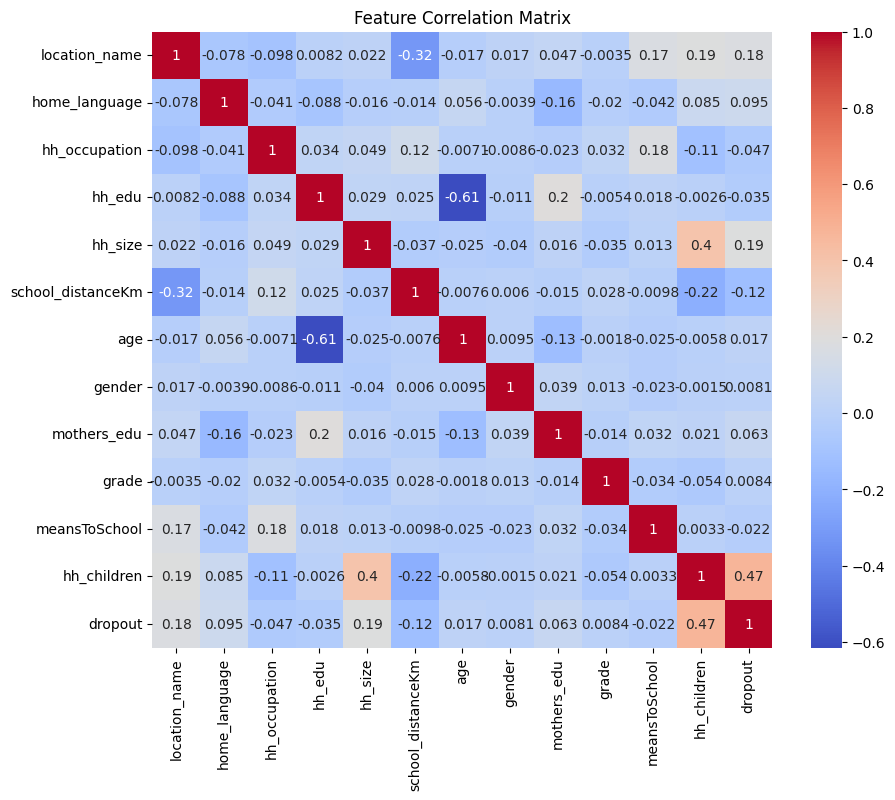

In [49]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [50]:
df_corr = correlation_matrix['dropout']
df_abs_corr = df_corr.abs().sort_values(ascending=True)
df_abs_corr = pd.DataFrame(df_abs_corr)
df_abs_corr

,dropout
gender,0.008125
grade,0.008362
age,0.016649
meansToSchool,0.022155
hh_edu,0.035041
hh_occupation,0.047341
mothers_edu,0.063039
home_language,0.095066
school_distanceKm,0.123164
location_name,0.178531


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206883 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   location_name      206883 non-null  int64   
 1   home_language      206883 non-null  int64   
 2   hh_occupation      206883 non-null  int64   
 3   hh_edu             206883 non-null  int64   
 4   hh_size            206883 non-null  int64   
 5   school_distanceKm  206883 non-null  category
 6   age                206883 non-null  int64   
 7   gender             206883 non-null  int64   
 8   mothers_edu        206883 non-null  int64   
 9   grade              206883 non-null  int64   
 10  meansToSchool      206883 non-null  int64   
 11  hh_children        206883 non-null  int64   
 12  dropout            206883 non-null  int64   
dtypes: category(1), int64(12)
memory usage: 20.7 MB


In [52]:
df.to_csv("encoded_df.csv", index=False)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'dropout' is your target column
X = df.drop('dropout', axis=1)
y = df['dropout']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier and train it on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Train Accuracy: {train_accuracy}, Accuracy: {accuracy}")

Train Accuracy: 0.9278213478665426, Accuracy: 0.9230973729366556


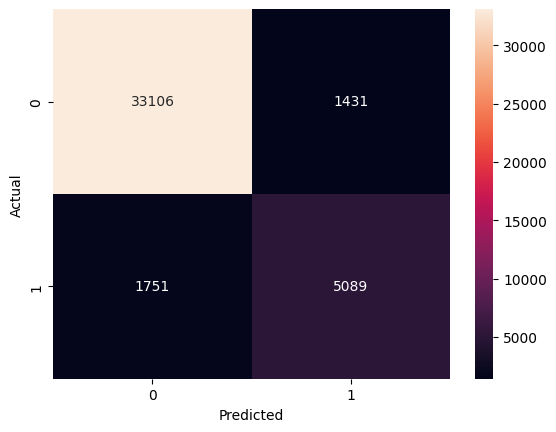

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
gender_mapping = {1: 'Male', 2: 'Female'}
home_language_mapping = {0: 'Kiswahili', 1: 'English', 2: 'Native language'}
hh_occupation_mapping = {0: 'Other', 1: 'Unemployed', 2: 'Agriculture', 3: 'Self-employed', 4: 'Public sector', 5: 'Private sector', 6: 'Housewife'}
hh_children_mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children', 5: 'More than five'}
mothers_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
hh_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
meansToSchool_mapping = {0: 'Walk', 1: 'Bicycle/motorbike', 2: 'Public transport', 3: 'Private car'}
location_name_mapping = {0: 'Rural', 1: 'Urban'}
grade_mapping = {9: 'Form One', 10: 'Form Two', 11: 'Form Three', 12: 'Form Four'}
dropout_mapping = {0: 'No', 1: 'Yes'}
school_distance_mapping = {1: '0-0.5 km', 2: '0.5-1 km', 3: '1-2 km', 4: '2-3 km', 5: '4-5 km', 6: '6-7 km', 7: '7-10 km', 8: 'More than 11 km'}

# Reverse mappings
gender_mapping_reverse = {v: k for k, v in gender_mapping.items()}
home_language_mapping_reverse = {v: k for k, v in home_language_mapping.items()}
hh_occupation_mapping_reverse = {v: k for k, v in hh_occupation_mapping.items()}
hh_children_mapping_reverse = {v: k for k, v in hh_children_mapping.items()}
mothers_edu_mapping_reverse = {v: k for k, v in mothers_edu_mapping.items()}
hh_edu_mapping_reverse = {v: k for k, v in hh_edu_mapping.items()}
meansToSchool_mapping_reverse = {v: k for k, v in meansToSchool_mapping.items()}
location_name_mapping_reverse = {v: k for k, v in location_name_mapping.items()}
grade_mapping_reverse = {v: k for k, v in grade_mapping.items()}
dropout_mapping_reverse = {v: k for k, v in dropout_mapping.items()}
school_distance_mapping_reverse = {v: k for k, v in school_distance_mapping.items()}


def encode_row(row, dropout=False):
    row = row.copy()
    row['gender'] = gender_mapping[row['gender']]
    row['home_language'] = home_language_mapping[row['home_language']]
    row['hh_occupation'] = hh_occupation_mapping[row['hh_occupation']]
    row['hh_children'] = hh_children_mapping[row['hh_children']]
    row['mothers_edu'] = mothers_edu_mapping[row['mothers_edu']]
    row['hh_edu'] = hh_edu_mapping[row['hh_edu']]
    row['meansToSchool'] = meansToSchool_mapping[row['meansToSchool']]
    row['location_name'] = location_name_mapping[row['location_name']]
    row['grade'] = grade_mapping[row['grade']]
    row['school_distanceKm'] = school_distance_mapping[row['school_distanceKm']]
    row['hh_size'] = hh_children_mapping[row['hh_size']]
    if dropout:
        row['dropout'] = dropout_mapping[row['dropout']]
    return row

def decode_row(row, dropout=False):
    row = row.copy()
    row['gender'] = gender_mapping_reverse[row['gender']]
    row['home_language'] = home_language_mapping_reverse[row['home_language']]
    row['hh_occupation'] = hh_occupation_mapping_reverse[row['hh_occupation']]
    row['hh_children'] = hh_children_mapping_reverse[row['hh_children']]
    row['mothers_edu'] = mothers_edu_mapping_reverse[row['mothers_edu']]
    row['hh_edu'] = hh_edu_mapping_reverse[row['hh_edu']]
    row['meansToSchool'] = meansToSchool_mapping_reverse[row['meansToSchool']]
    row['location_name'] = location_name_mapping_reverse[row['location_name']]
    row['grade'] = grade_mapping_reverse[row['grade']]
    row['school_distanceKm'] = school_distance_mapping_reverse[row['school_distanceKm']]
    row['hh_size'] = hh_children_mapping_reverse[row['hh_size']]
    if dropout:
        row['dropout'] = dropout_mapping[row['dropout']]

    return row

In [57]:
sample_row = df.iloc[1]

In [58]:
enc_row = encode_row(sample_row)

In [59]:
decode_row(enc_row)

location_name         0
home_language         2
hh_occupation         0
hh_edu                1
hh_size               5
school_distanceKm     1
age                  11
gender                2
mothers_edu           1
grade                 9
meansToSchool         0
hh_children           5
dropout               1
Name: 1, dtype: object

In [63]:
import random

In [96]:
# Assuming df is your DataFrame and 'dropout' is your target column
sample_row = df.iloc[random.randint(0, len(df))]
sample =  sample_row.drop('dropout')
print(encode_row(sample))

# Predict probabilities on the sample
y_pred_proba = clf.predict_proba([sample])

# Get the class with the highest probability
predicted_class = np.argmax(y_pred_proba, axis=1)

# Map the predicted class to the corresponding category
predicted_category = dropout_mapping[predicted_class[0]]


print("---\nResults: ", predicted_category)
print("Actual: ", sample_row['dropout'])
y_pred_proba

location_name                 Rural
home_language             Kiswahili
hh_occupation            Unemployed
hh_edu                         None
hh_size              More than five
school_distanceKm            2-3 km
age                              16
gender                         Male
mothers_edu                 Primary
grade                      Form Two
meansToSchool                  Walk
hh_children          Three Children
Name: 89101, dtype: object
---
Results:  No
Actual:  0


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.84349739, 0.15650261]])

In [97]:
labeled_df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,Native language,Other,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,More than five,Yes
1,Rural,Native language,Other,Primary,More than five,0-0.5 km,11,Female,Primary,Form One,Walk,More than five,Yes
2,Rural,Kiswahili,Other,Primary,More than five,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five,Yes
3,Urban,Kiswahili,Private sector,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,Five Children,No
4,Urban,Kiswahili,Other,None,More than five,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five,Yes


In [98]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming labeled_df is your DataFrame and 'dropout' is the target column

# Define the undersampling method
undersample = RandomUnderSampler(sampling_strategy='majority')

# Perform undersampling
_X = labeled_df.drop('dropout', axis=1)
_y = labeled_df['dropout']
X_under, y_under = undersample.fit_resample(_X, _y)


In [103]:
# label encode  X_under
X_under = X_under.apply(decode_row, axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, train_pred)


print(f"Train Accuracy: {train_accuracy}, Accuracy: {accuracy}")


Train Accuracy: 0.908636859727335, Accuracy: 0.8980392156862745
